# _Set Up_

In [18]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [19]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os
from pathlib import Path

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [20]:
path = os.getcwd()
path

'/Users/joeai/Springboard/unit17-take-home-challenges/ultimate_technologies'

# _Load in Data_

In [21]:
from ultimate_challenge import analysis

df = analysis.load_data(path)
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
count    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


# _Data Prep_

In [23]:
resample_df = analysis.data_prep(df)

In [24]:
resample_df.head()

,count,time
login_time,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00


In [25]:
resample_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 2 columns):
count    9788 non-null int64
time     9788 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 229.4 KB


# _Extract Date Info from `login-df`_

In [26]:
logins_df = analysis.extract_data_info(resample_df)
logins_df.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,1,1,20,1,3
1970-01-01 20:15:00,6,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,9,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,7,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,1,1970-01-01 21:00:00,1,1,21,1,3


Grouping by Month
month
1    21239
2    24673
3    33723
4    13507
Name: count, dtype: int64
------------------------------


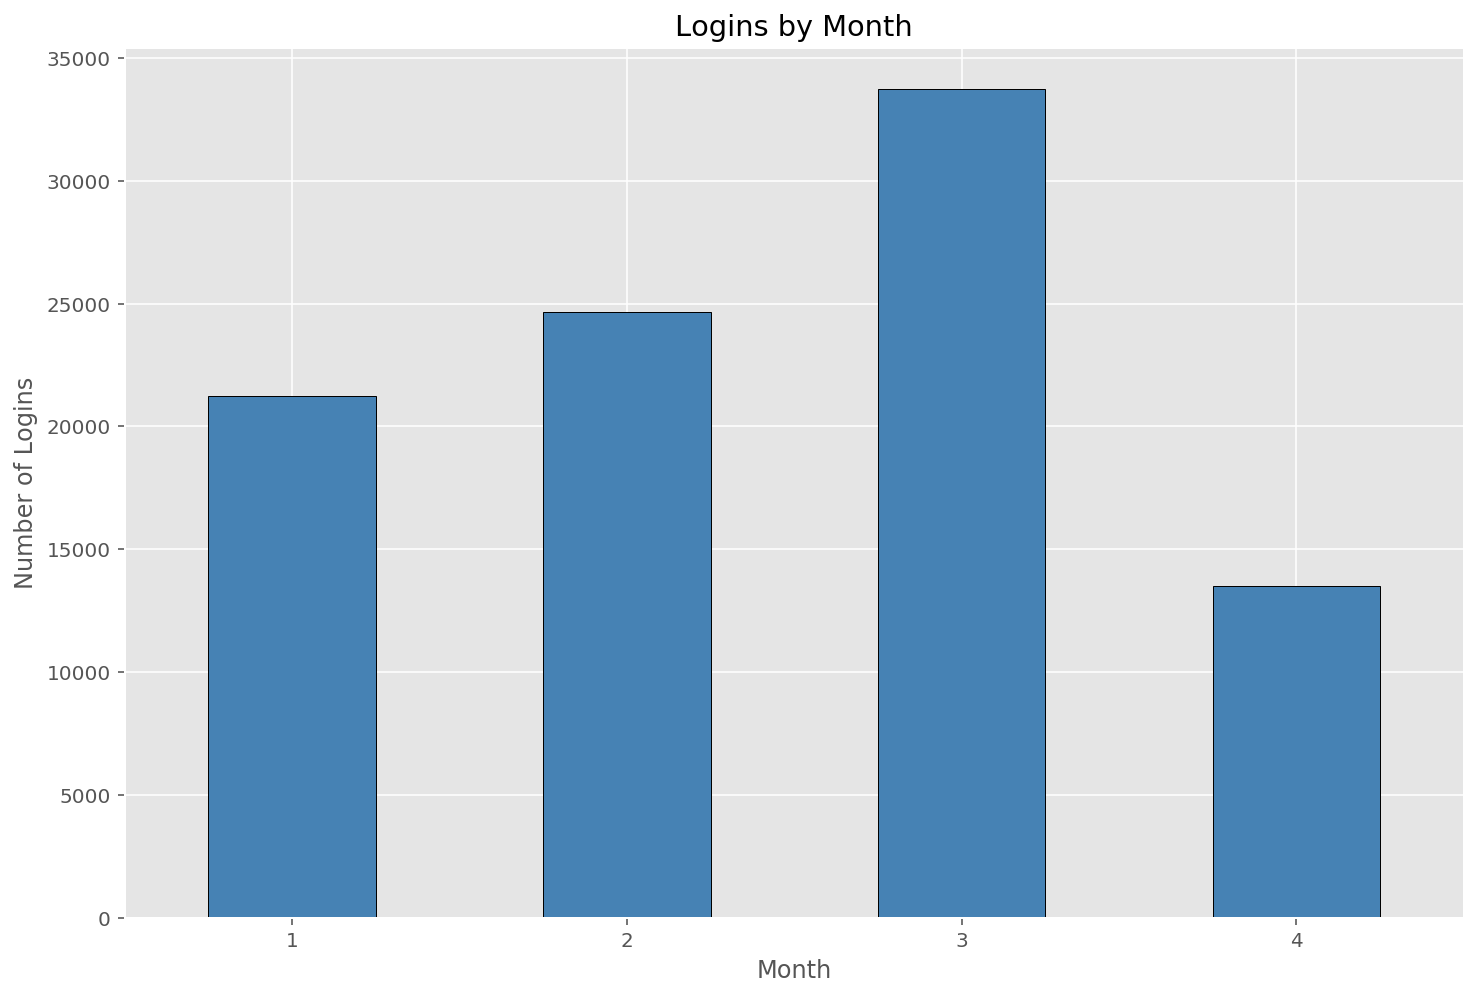

In [37]:
analysis.groupby_plot(logins_df, 'month')

# _Observations: Logins by Month_

The graph above give us a great high-level overview of the breakdown of logins by month. It looks like logins steadily increased until the third month, and then dropped off rather suddenly in the fourth month. After further investigation, we found that observations for April only went until the 13th of the month. Now the steep drop-off makes sense. 

Next, we'll look at a weekly breakdown of the number of logins.

Grouping by Week
week
1     2374
2     5217
3     5023
4     4751
5     4744
6     5572
7     5915
8     7035
9     6554
10    7398
11    7338
12    8955
13    7285
14    8095
15    6491
16     395
Name: count, dtype: int64
------------------------------


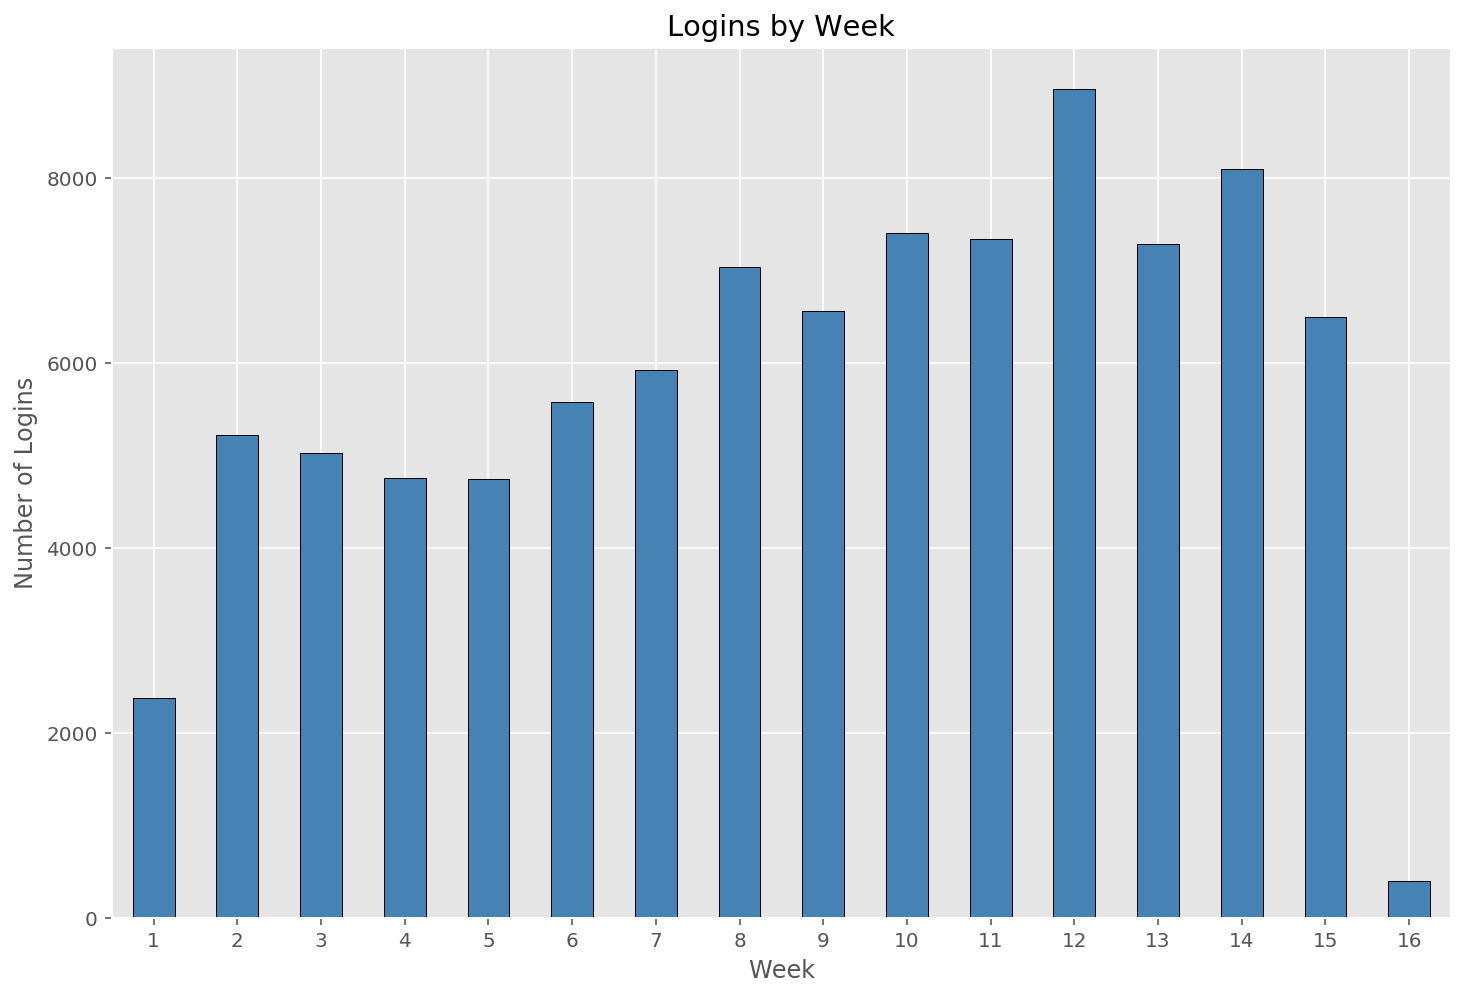

In [38]:
analysis.groupby_plot(logins_df, 'week')

# _Observations: Logins by Week_

In a way, the above graph that shows the sum of logins by week trends similarly with the month graph from above. At about week 5, the number of logins steadily increases until its peak at week 12. Week 5 to week 12 encompasses months 2 and 3, and while it gives us a little more nuanced information, this graph reasserts our previous statement that there was a steady increase from month 1 until month 3. 

Next, we'll take a look at the daily breakdown which will aggregate the number of logins on a day-by-day basis, irregardless of the month or week. 

Grouping by Day
day
1     3194
2     3044
3     3475
4     4037
5     3223
6     3281
7     4006
8     4019
9     2832
10    3297
11    3863
12    3614
13    3021
14    3426
15    3331
16    2215
17    3044
18    2945
19    2859
20    2885
21    3487
22    3507
23    2233
24    2318
25    2348
26    2176
27    2735
28    3540
29    2197
30    1415
31    1575
Name: count, dtype: int64
------------------------------


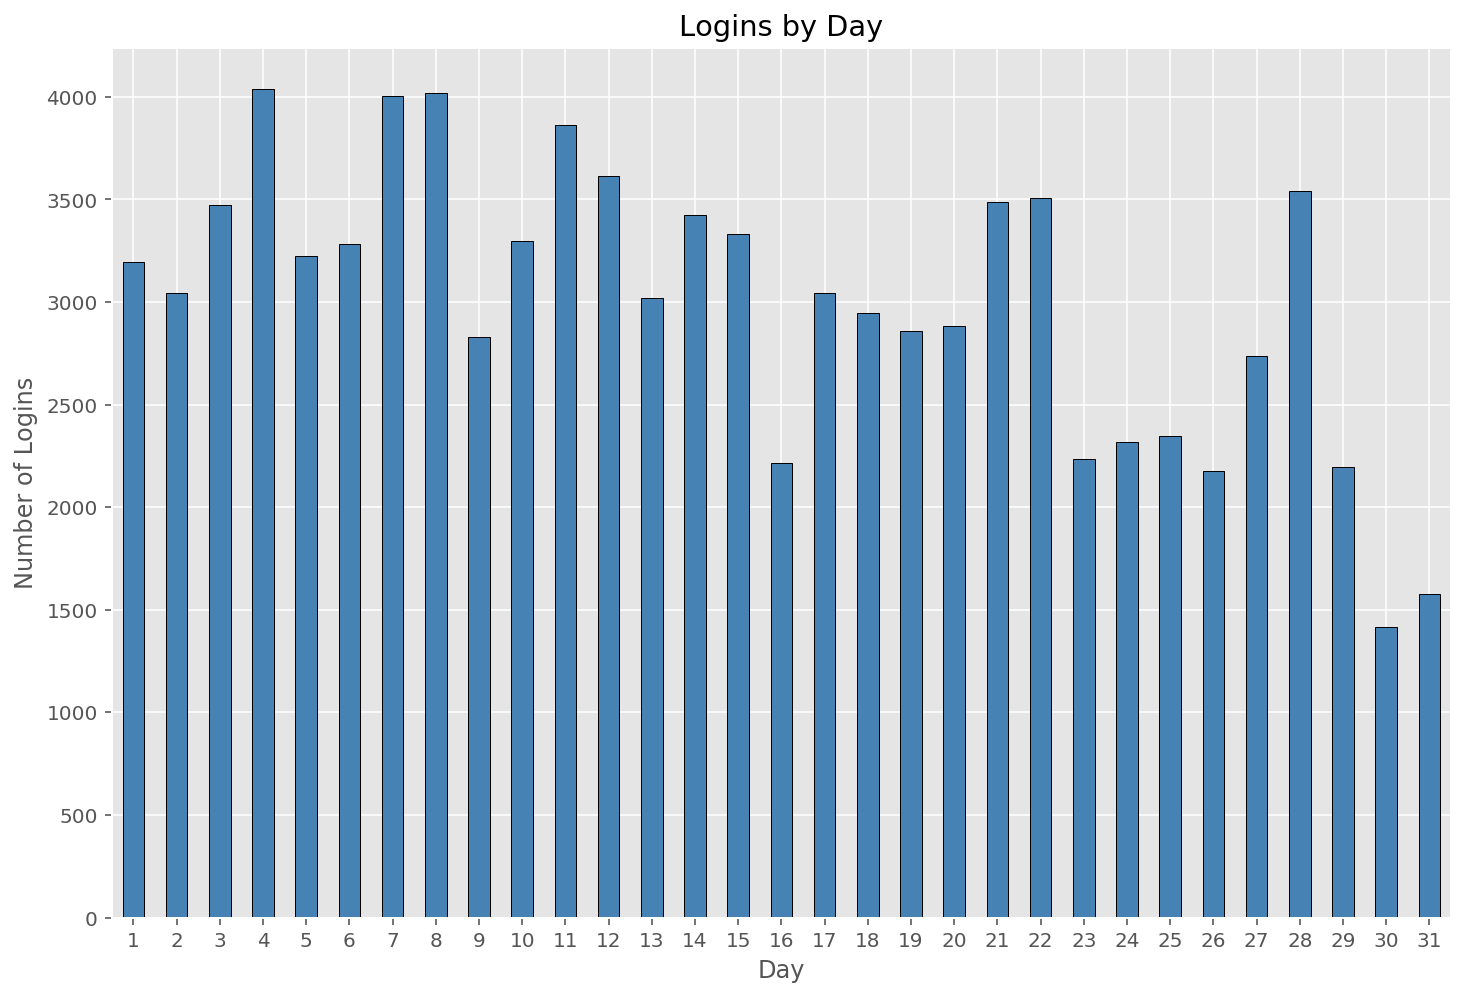

In [39]:
analysis.groupby_plot(logins_df, 'day')

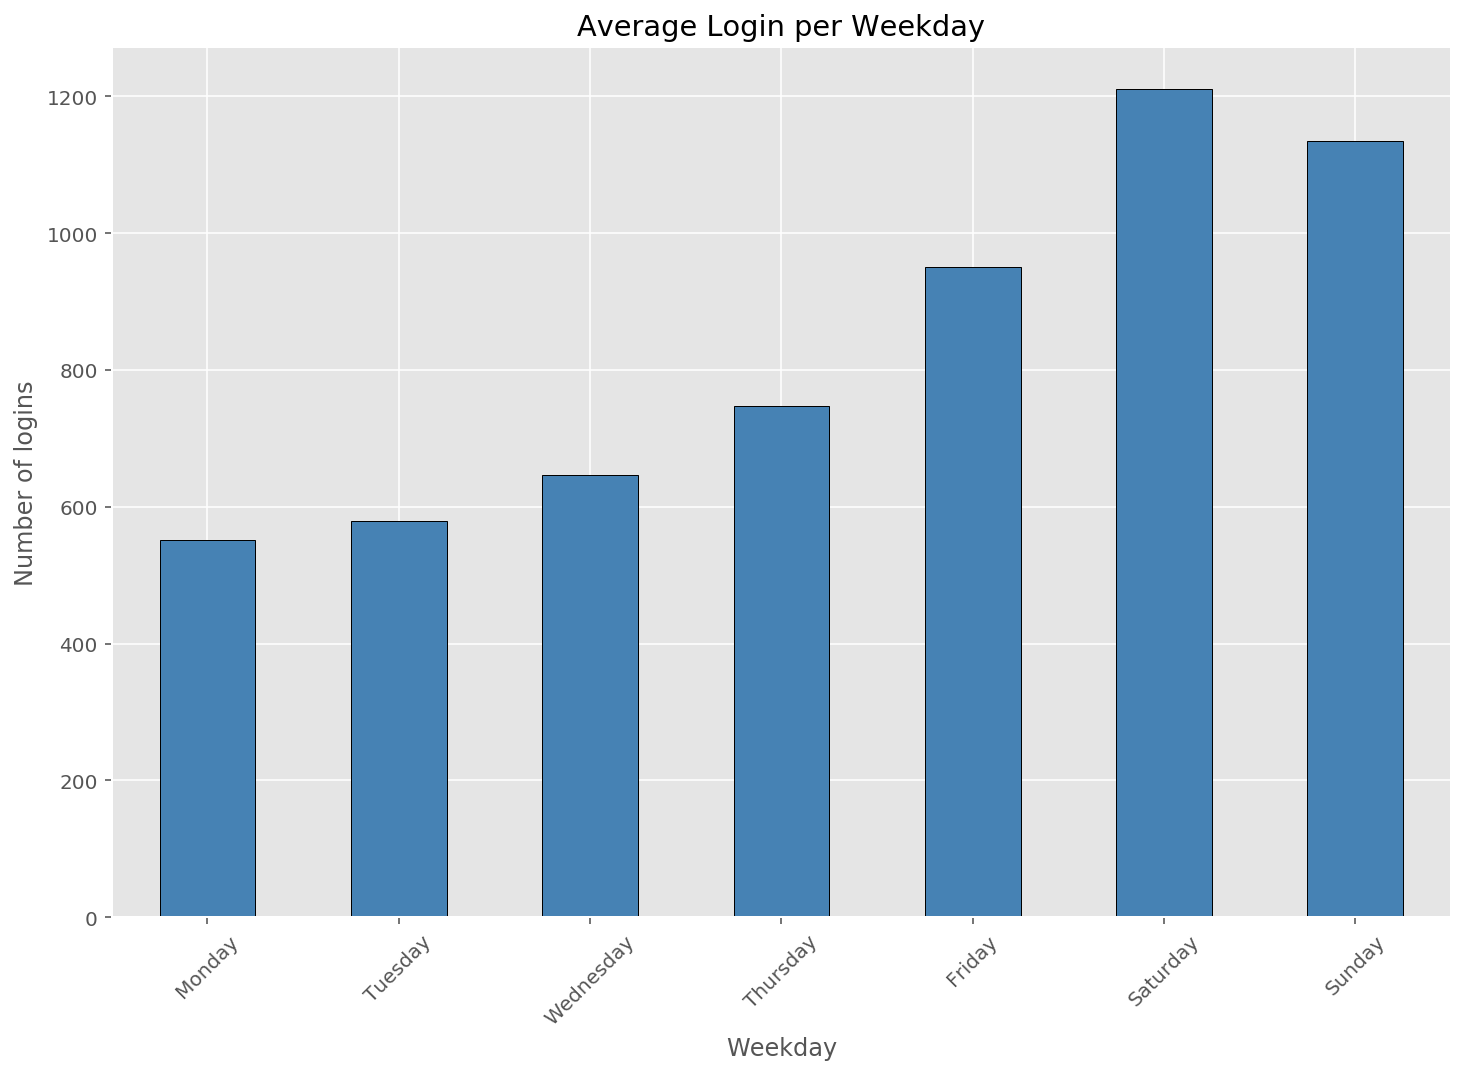

In [42]:
analysis.groupby_plot(logins_df, 'day', weekday=True)

# _Observations: Logins by day_

The first graph shows the breakdown of logins by each day within any given month. In other words, it sums the total number of logins on the 1st of every month, 2nd of every month, etc. 

The first insight is that there appears to be general downtrend in that there appears to be more logins earlier in the month versus later in the month. 

Secondly, there appears to be a 'double-spike' in number of logins at a certain interval. A good first guess might be that these particular days might have fallen more often on weekends, where ridership levels tend to be higher. 

Now the second graph takes a slightly different approach and shows the average based on the day of the week. Overall the results are not too surprising in that we see a steady rise in logins as the weekend approaches. Then on Saturday and Sunday we have the highest number of average logins per a weekly basis.

# _Daily Trends_

In [48]:
# create dataframe that shows login count by dat
day_df = analysis.resample_df(df, 'D')
day_df.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [49]:
# add data and weekday column
day_df['date'] = pd.to_datetime(day_df.index)
day_df['weekday'] = day_df['date'].dt.weekday
day_df.head()

,count,date,weekday
login_time,,,
1970-01-01,112,1970-01-01,3
1970-01-02,681,1970-01-02,4
1970-01-03,793,1970-01-03,5
1970-01-04,788,1970-01-04,6
1970-01-05,459,1970-01-05,0


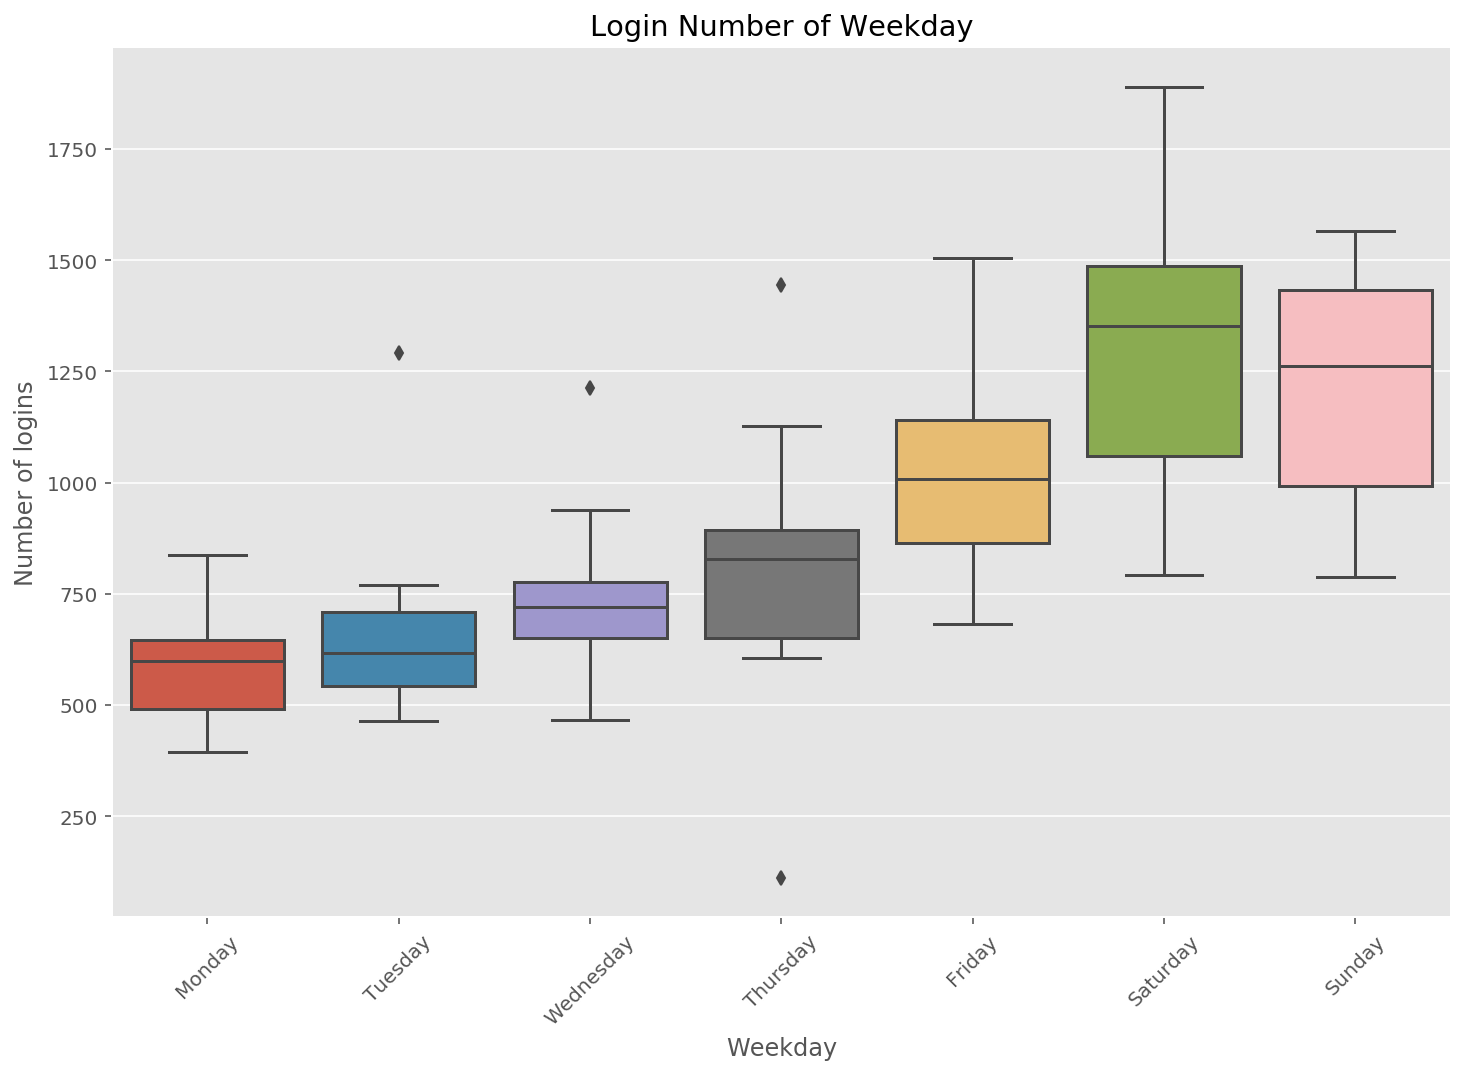

In [53]:
analysis.boxplot_graph(day_df, x = 'weekday', y = 'count', timeframe='Weekday')

# _Observations: Weekday Boxplot_

This boxplot shows a similar trend to the average login per weekday bar graph above; the number of logins gradually increases until maxing out (on average) on Saturday with Sunday being slightly less. 

However, we are able to gain a few more insights in regards to the variability of the logins. We can see that early in the week (i.e. Monday, Tuesday and Wednesday) the variability of the number of logins stayed within a relatively tight window. On Thursday, this variability of logins increases and continues to increase into the weekend. 

Additionally, there appear to be a few outliers in regards to the number of logins on Tuesday, Wednesday and Thursday (which had both an abnormally high and low observation). 

# _Logins by Hour_ CONTINUE HERE JULY 14

# _Resample: 15 min Intervals_

In [91]:
interval_df = analysis.resample_15_min(logins_df)

interval_df.head()

KeyError: 'login_time'

In [66]:
interval_df.shape

(9788, 1)

In [67]:
interval_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 472.9 KB


In [69]:
interval_df.isnull().sum()

count    0
dtype: int64

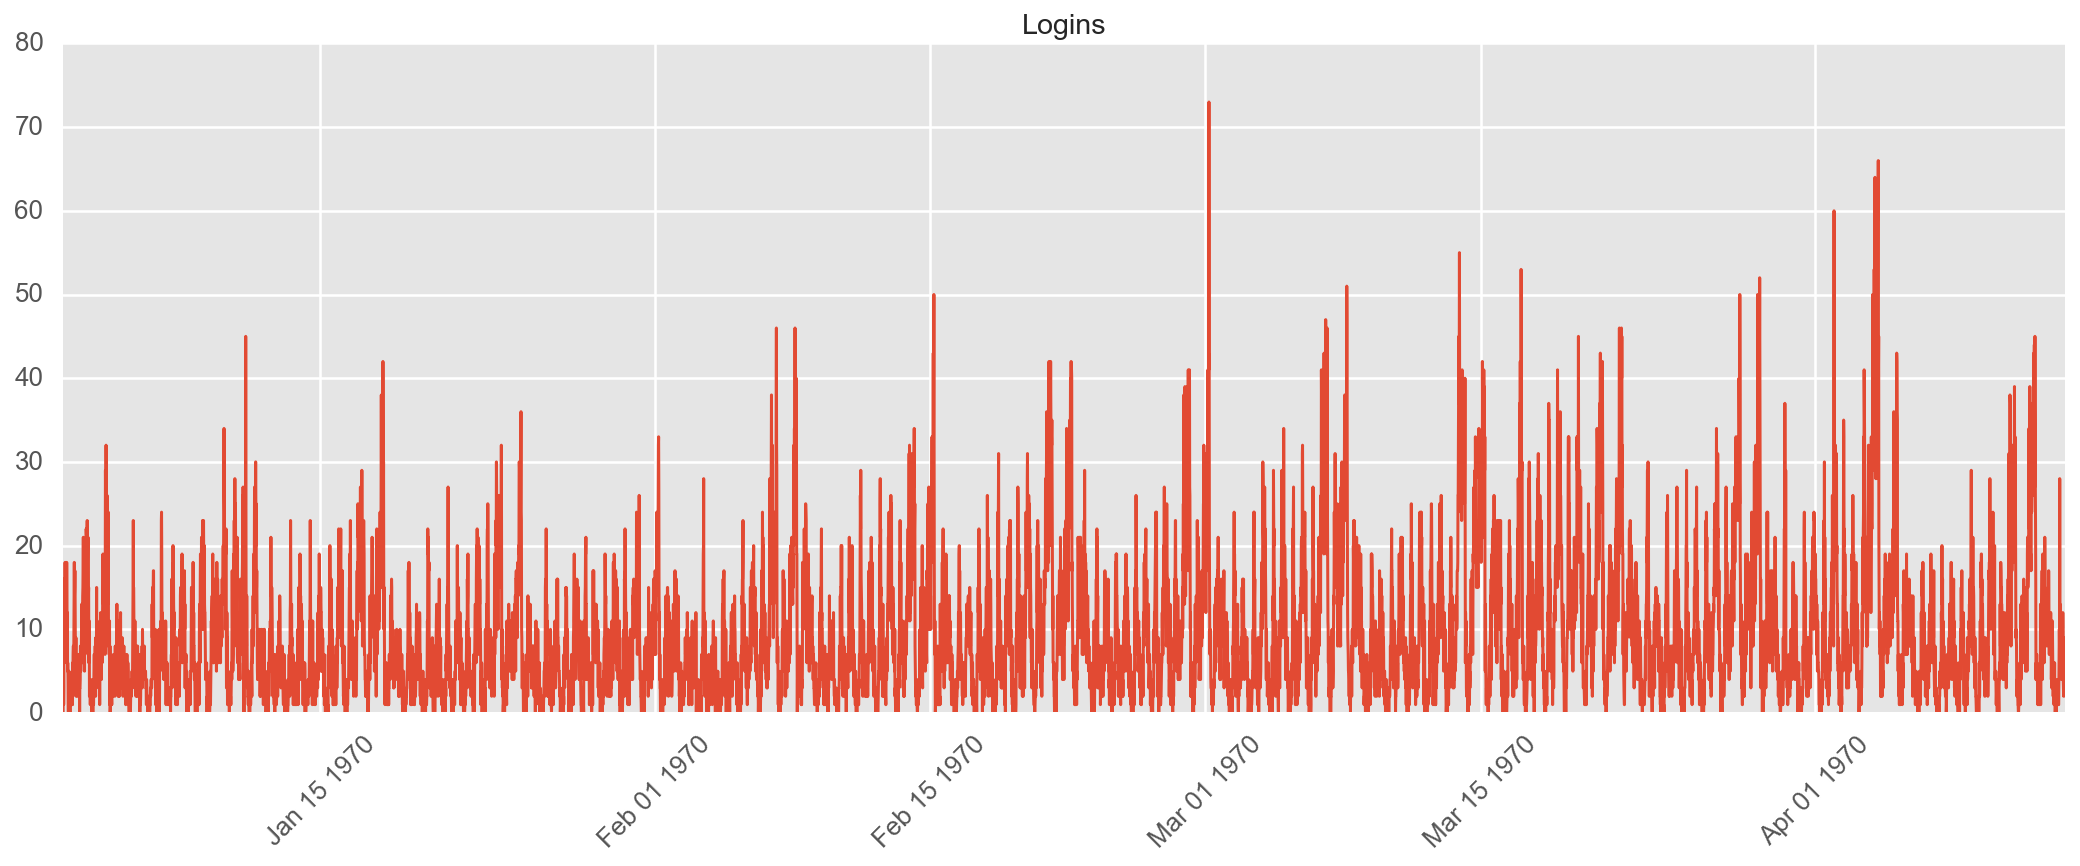

In [34]:
analysis.plot_series(interval_df)

# _Observations_

That didn't go as planned. While this graph provides little value, we can still see that there appear to be peak times in regards to logins, so it's not completely useless!

# _Separate Data into Months_

In [73]:
jan_df, feb_df, march_df, apr_df = analysis.month_dfs(interval_df)

In [79]:
jan_df = analysis.extract_data_info(jan_df)
feb_df = analysis.extract_data_info(feb_df)
march_df = analysis.extract_data_info(march_df)
apr_df = analysis.extract_data_info(apr_df)

In [80]:
jan_df.tail()

,login_time,count,month,day,hour,week,weekday
2891,1970-01-31 22:45:00,16,1,31,22,5,5
2892,1970-01-31 23:00:00,10,1,31,23,5,5
2893,1970-01-31 23:15:00,9,1,31,23,5,5
2894,1970-01-31 23:30:00,7,1,31,23,5,5
2895,1970-01-31 23:45:00,14,1,31,23,5,5


In [81]:
feb_df.tail()

,login_time,count,month,day,hour,week,weekday
2683,1970-02-28 22:45:00,20,2,28,22,9,5
2684,1970-02-28 23:00:00,23,2,28,23,9,5
2685,1970-02-28 23:15:00,27,2,28,23,9,5
2686,1970-02-28 23:30:00,17,2,28,23,9,5
2687,1970-02-28 23:45:00,18,2,28,23,9,5


In [82]:
march_df.tail()

,login_time,count,month,day,hour,week,weekday
2971,1970-03-31 22:45:00,21,3,31,22,14,1
2972,1970-03-31 23:00:00,24,3,31,23,14,1
2973,1970-03-31 23:15:00,23,3,31,23,14,1
2974,1970-03-31 23:30:00,23,3,31,23,14,1
2975,1970-03-31 23:45:00,14,3,31,23,14,1


In [83]:
apr_df.tail()

,login_time,count,month,day,hour,week,weekday
1223,1970-04-13 17:45:00,5,4,13,17,16,0
1224,1970-04-13 18:00:00,5,4,13,18,16,0
1225,1970-04-13 18:15:00,2,4,13,18,16,0
1226,1970-04-13 18:30:00,7,4,13,18,16,0
1227,1970-04-13 18:45:00,6,4,13,18,16,0


# _January Analysis_

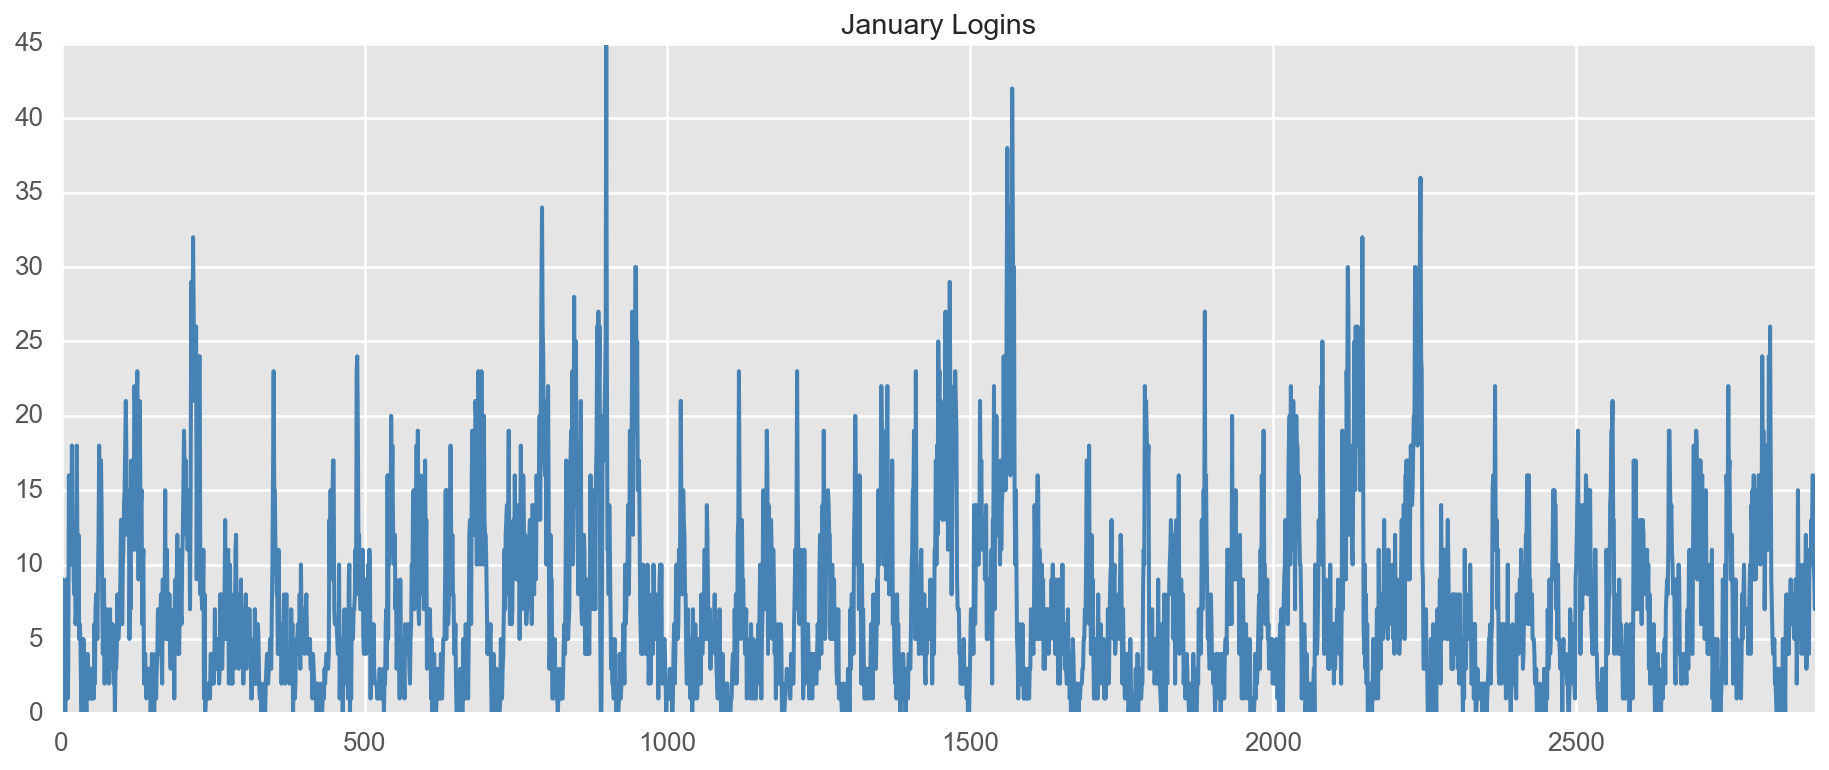

In [84]:
jan_df['count'].plot(figsize=(14,6), linewidth=2, legend=False, title='January Logins', color='steelblue');

# _Observations_

So this is a little more informative than our original plot from above. First, we get to see the trend in number of logins over just the month of January; second, we can pick up that there appear to be four spikes in the number of logins. 

I have a hunch that these spikes are weekends so next we'll try to breakdown the analysis into days of the week.

In [85]:
for df in [jan_df, feb_df, march_df, apr_df]:
    df.info()
    print('-' * 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 7 columns):
login_time    2896 non-null datetime64[ns]
count         2896 non-null int64
month         2896 non-null int64
day           2896 non-null int64
hour          2896 non-null int64
week          2896 non-null int64
weekday       2896 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 158.5 KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 7 columns):
login_time    2688 non-null datetime64[ns]
count         2688 non-null int64
month         2688 non-null int64
day           2688 non-null int64
hour          2688 non-null int64
week          2688 non-null int64
weekday       2688 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 147.1 KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 7 columns):
login_ti